In [25]:
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate
import numpy as np

# Example

Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.pchip_interpolate.html

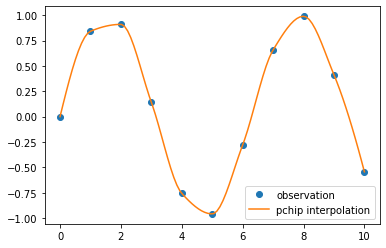

In [26]:
x_observed = np.linspace(0.0, 10.0, 11)
y_observed = np.sin(x_observed)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = pchip_interpolate(x_observed, y_observed, x)
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="pchip interpolation")
plt.legend()
plt.show()

# My exe

In [27]:
!pip install simpledbf
from google.colab import drive
from scipy.interpolate import interp2d
from simpledbf import Dbf5
import pandas as pd
import datetime
import time
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path = '/content/drive/MyDrive/Colab Notebooks/Agrimonia/Suini/Suini.dbf'
df = Dbf5(path).to_dataframe()
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')
df.rename(columns = {'DATE':'Date'}, inplace = True)

#Calculate the density
operation = df['NUMEROCAPI']/df['Shape_Area']
df['NUMEROCAPI'] = operation*pow(10,6)
df = df.loc[(df['COD_REG'] == 1) | (df['COD_REG'] == 3)|(df['COD_REG'] == 4) | (df['COD_REG'] == 5) |(df['COD_REG'] == 8)]

df.rename(columns = {'NUMEROCAPI':'DENSITY',}, inplace = True)


df.drop(df.iloc[:,17:28], axis=1, inplace=True) 

print(type(df))
print(df.shape)
pd.set_option('display.max_columns', None)
df.head()

<class 'pandas.core.frame.DataFrame'>
(50206, 18)


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT,DENSITY,NALLEVAMENT,Date
0,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,0.58226,2,2015-12-31
1,1,1,1,201,201,1079,001079,Chiesanuova,NaN,0,4.118911e+06,10777.318814,394197.394664,5.030811e+06,0,0.00000,0,2015-12-31
2,1,1,1,201,201,1089,001089,Coazze,NaN,0,5.657268e+07,41591.122092,360808.802237,4.990104e+06,0,0.00000,0,2015-12-31
3,1,1,1,201,201,1006,001006,Almese,NaN,0,1.787564e+07,17058.439037,375721.501086,4.997294e+06,0,0.00000,0,2015-12-31
4,1,1,1,201,201,1007,001007,Alpette,NaN,0,5.626076e+06,9795.562269,388609.910901,5.029096e+06,0,0.00000,0,2015-12-31


## Mockup station

In [30]:
table_to_examine = df.loc[df['PRO_COM'] == 1077]
print(table_to_examine.shape)
table_to_examine.head()

(13, 18)


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT,DENSITY,NALLEVAMENT,Date
0,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,0.58226,2,2015-12-31
7904,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,0.58226,2,2016-06-30
15808,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,0.58226,2,2016-12-31
23712,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,0.41590,2,2017-06-30
31616,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,0.41590,2,2017-12-31


## Functions

In [31]:
def fill_missing_dates(df, start, end, freq='d', column='Date'):    
    '''
    Fills the rows of a specific column with the dates between start and end and with a given frequency.
    Parameters:
        df      (DataFrame) : The DataFrame to be filled
        column     (string) : The target column
        start      (string) : The time interval start date
        end        (string) : The time interval end date
        freq       (string) : The frequency of the date ranging
    
    Returns:
        df      (DataFrame) : The filled DataFrame 
    '''
    index = pd.Index(pd.date_range(start, end, freq=freq))

    if len(df) < len(index):

        df[column] = pd.to_datetime(df[column])

        df = fill_missing_rows(df, column, index)

        assert(len(df) == len(index))

    return df

In [32]:

def fill_missing_rows(df, column, fillwith):
    '''
    Fills the rows of a specific column with a provided list of values.
    Parameters:
        df       (DataFrame)  : The DataFrame to be filled
        column      (string)  : The target column
        fillwith      (list)  : The list of values to fill the column with
    
    Returns:
        df       (DataFrame)  : The filled DataFrame
    '''
    df = df.set_index(column).reindex(pd.Index(fillwith))

    df.reset_index(inplace=True)

    df = df.rename(columns={'index': column})

    return df

## Call functions

In [33]:
result = fill_missing_dates(table_to_examine, '2015-12-31', '2021-12-31')
print(result.shape)
result.head()

(2193, 18)


<ipython-input-31-d8c1033fdc5d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_datetime(df[column])


,Date,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT,DENSITY,NALLEVAMENT
0,2015-12-31,1.0,1.0,1.0,201.0,201.0,1077.0,001077,Chiaverano,NaN,0.0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0.0,0.58226,2.0
1,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extract all the dates

In [34]:
allDates = result['Date']
print(allDates.shape)

allDates.head()

(2193,)


0   2015-12-31
1   2016-01-01
2   2016-01-02
3   2016-01-03
4   2016-01-04
Name: Date, dtype: datetime64[ns]

# Interpolation

In [38]:
y = pchip_interpolate(table_to_examine['Date'], table_to_examine['DENSITY'], allDates)
print(type(y))
print(y.shape)
y

<class 'numpy.ndarray'>
(2193,)


array([0.58226007, 0.58226007, 0.58226007, ..., 0.41590005, 0.41590005,
       0.41590005])

## Plot of the data

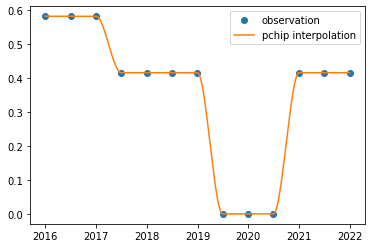

In [39]:
plt.plot(table_to_examine['Date'], table_to_examine['DENSITY'], "o", label="observation")
plt.plot(allDates, y, label="pchip interpolation")
plt.legend()
plt.show()